# **Problem Description**

This project involves working with the moonDataset.csv, which contains 200 data points across four columns. The features X1 and X2 are derived from a 2D 'moons' shape, a common structure used for testing non-linear classification algorithms, while X3 introduces a vertical displacement, creating a 3D effect and adding complexity to the dataset. The label column provides a binary class for each data point, indicating whether it belongs to class 0 or 1. Your task is to perform non-linear classification using Gaussian Mixture Models (GMMs). Begin by exploring and visualizing the dataset to understand the 3D structure and the distribution of data points. Then, implement GMMs to classify the data points into their respective classes based on the provided features, analyzing the model's performance and effectiveness in handling non-linear boundaries. <a href="https://www.kaggle.com/datasets/emadmakhlouf/linearly-inseperable-dataset">moonData Set</a>

# **Setup**

<div style="font-size:18px;">

| #   | Column Name | Description                                                   |
|-----|-------------|---------------------------------------------------------------|
| 1   | X1          | First feature derived from the 2D 'moons' shape (horizontal)   |
| 2   | X2          | Second feature derived from the 2D 'moons' shape (vertical)    |
| 3   | X3          | Vertical displacement feature creating a 3D effect            |
| 4   | Label       | Binary class of the data point (0 or 1)                       |

</div>

# **Importing Libraries**

In [69]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture   #Importing this just for comparision
from sklearn.metrics import classification_report
from scipy.interpolate import griddata
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Create Dataframe**

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/moonDataset.csv'
df = pd.read_csv(file_path)

# Shuffling Datapoints
# df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df.head())

         X1        X2        X3  label
0 -0.926767 -0.111073  0.086017      0
1 -0.917583  0.706006  0.058041      0
2  0.437984  0.899093  0.072543      0
3  0.089694  0.291446  0.070444      1
4  0.110672 -0.070806 -0.090376      1


# **EDA(Exploratory Data Analysis)**

label
0    100
1    100
Name: count, dtype: int64


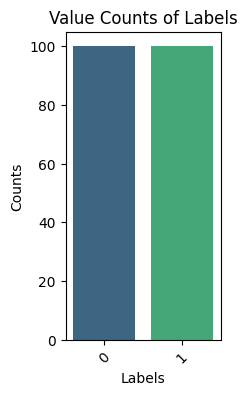

In [70]:
# Distribution of classes
print(df['label'].value_counts())

label_counts = df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(2, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Value Counts of Labels')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

## **Inference:**
*   Dataset is balanced.
*   There are two classes (class 0 and class 1) each having 100 data points.


In [ ]:
# Descriptive statistics
print(df.describe())

               X1          X2          X3       label
count  200.000000  200.000000  200.000000  200.000000
mean     0.499625    0.242255   -0.007900    0.500000
std      0.864680    0.505837    0.060073    0.501255
min     -1.082877   -0.671388   -0.099842    0.000000
25%     -0.066660   -0.182419   -0.059922    0.000000
50%      0.517917    0.215962   -0.010587    0.500000
75%      1.044591    0.696222    0.040636    1.000000
max      2.148725    1.168358    0.099933    1.000000


## **Inference:**
*   The dataset contains 200 sample points.
*   Feature X1 and X2 have a high variance.
*   X3 has a limited variance.




In [ ]:
# Separating features and labels
X = df[['X1', 'X2', 'X3']]
y = df['label']

print(X)
print(y)

           X1        X2        X3
0   -0.926767 -0.111073  0.086017
1   -0.917583  0.706006  0.058041
2    0.437984  0.899093  0.072543
3    0.089694  0.291446  0.070444
4    0.110672 -0.070806 -0.090376
..        ...       ...       ...
195 -0.540630  0.901834 -0.058539
196  0.032085  0.411465 -0.064823
197  0.691922  0.679103  0.020613
198  0.017034  0.930984 -0.034133
199  0.212676 -0.026037  0.013321

[200 rows x 3 columns]
0      0
1      0
2      0
3      1
4      1
      ..
195    0
196    1
197    0
198    0
199    1
Name: label, Length: 200, dtype: int64


In [ ]:
# Separate data based on class
class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]

print(class_0.head())
print(class_1.head())

         X1        X2        X3  label
0 -0.926767 -0.111073  0.086017      0
1 -0.917583  0.706006  0.058041      0
2  0.437984  0.899093  0.072543      0
5 -0.054722  1.094162 -0.021213      0
6  0.562865  0.847476  0.002738      0
          X1        X2        X3  label
3   0.089694  0.291446  0.070444      1
4   0.110672 -0.070806 -0.090376      1
7   0.569155 -0.521080 -0.068966      1
9   0.153995  0.332003 -0.080209      1
13  0.451788 -0.113059 -0.020589      1


In [ ]:
# Function to create a 3D surface plot for each class
def plot_surface(class_data, label, ax):
    grid_x, grid_y = np.mgrid[
        min(class_data['X1']):max(class_data['X1']):100j,
        min(class_data['X2']):max(class_data['X2']):100j
    ]
    grid_z = griddata(
        (class_data['X1'], class_data['X2']),
        class_data['X3'],
        (grid_x, grid_y),
        method='cubic'
    )

    # Plot the surface
    ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', edgecolor='none', alpha=0.7)
    ax.set_title(f'Class {label}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')

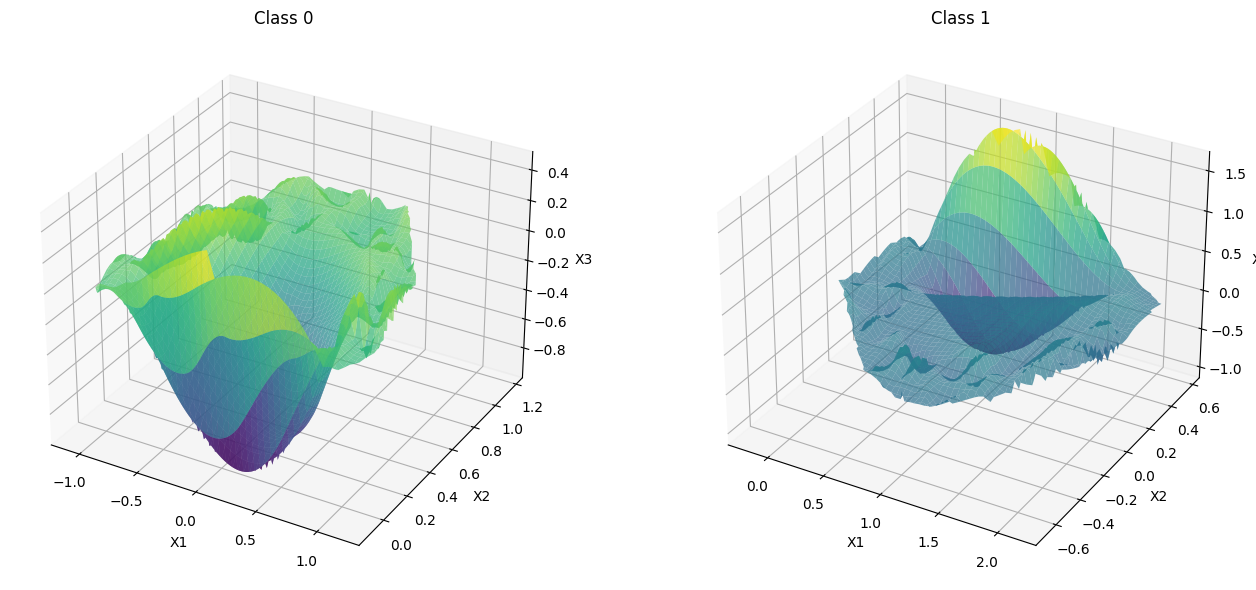

In [ ]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
plot_surface(class_0, 0, ax1)

ax2 = fig.add_subplot(122, projection='3d')
plot_surface(class_1, 1, ax2)

plt.tight_layout()
plt.show()

## **Inference:**


*   From the above figures of each class it can be inferred that both the classes' data points are coming from different Gaussian Distributions, hence it satisfies the hypothesis for Gaussian Mixture Model.



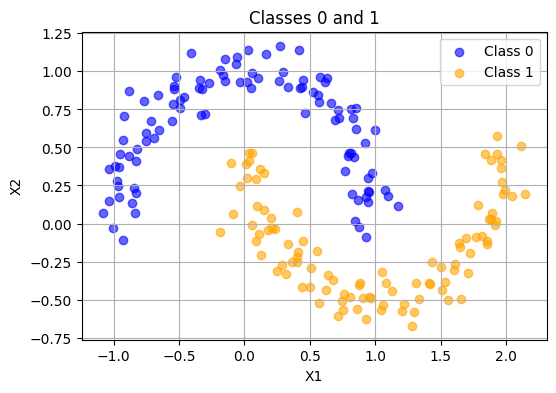

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(class_0['X1'], class_0['X2'], color='blue', alpha=0.6, label='Class 0')
plt.scatter(class_1['X1'], class_1['X2'], color='orange', alpha=0.6, label='Class 1')

plt.title('Classes 0 and 1')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()
plt.grid(True)
plt.show()

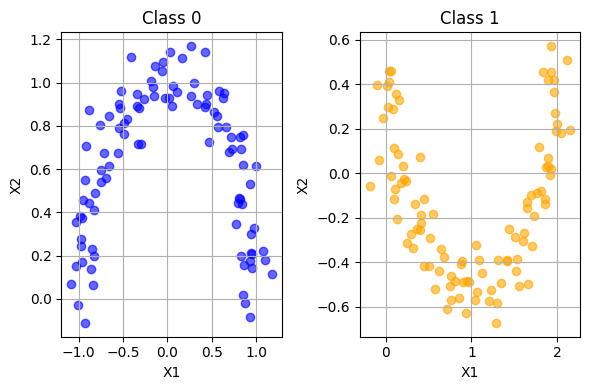

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(6, 4))

axs[0].scatter(class_0['X1'], class_0['X2'], color='blue', alpha=0.6)
axs[0].set_title('Class 0')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')
axs[0].grid(True)

axs[1].scatter(class_1['X1'], class_1['X2'], color='orange', alpha=0.6)
axs[1].set_title('Class 1')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def calculate_mean(arr):
    return sum(arr) / len(arr)

def calculate_covariance(arr1, arr2, mean1, mean2):
    covariance = 0.0
    for i in range(len(arr1)):
        covariance += (arr1[i] - mean1) * (arr2[i] - mean2)
    return covariance / (len(arr1) - 1)

def calculate_stddev(arr, mean):
    variance = sum((x - mean) ** 2 for x in arr) / (len(arr) - 1)
    return variance ** 0.5

def calculate_correlation(arr1, arr2):
    mean1, mean2 = calculate_mean(arr1), calculate_mean(arr2)
    stddev1, stddev2 = calculate_stddev(arr1, mean1), calculate_stddev(arr2, mean2)
    covariance = calculate_covariance(arr1, arr2, mean1, mean2)
    return covariance / (stddev1 * stddev2)

def corr_matrix(X):
    matrix = []
    num_features = len(X[0])

    # Iterate over all pairs of features to compute correlation
    for i in range(num_features):
        row = []
        for j in range(num_features):
            if i == j:
                row.append(1.0)  # Correlation of a variable with itself is 1
            else:
                col_i = [row[i] for row in X]
                col_j = [row[j] for row in X]
                row.append(calculate_correlation(col_i, col_j))
        matrix.append(row)

    return matrix

In [ ]:
correlation_matrix = corr_matrix(X.values) # passing X as 2d matrix here
print(correlation_matrix)

[[1.0, -0.4217814336297267, 0.052467240632036984], [-0.4217814336297267, 1.0, 0.13025666328653848], [0.052467240632036984, 0.13025666328653848, 1.0]]


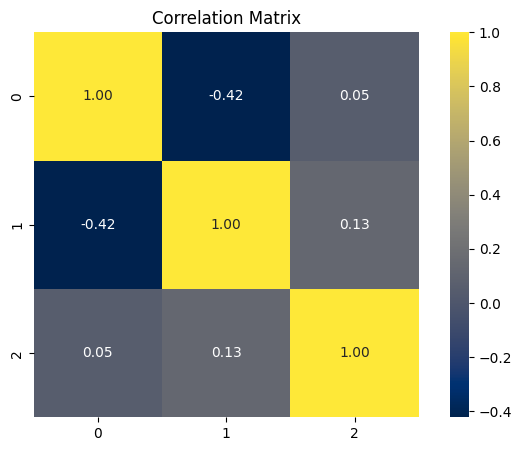

In [ ]:
plt.figure(figsize=(8, 5))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f", square=True)

plt.title('Correlation Matrix')
plt.show()

## **Inference:**


*   X1 and X2 exhibit some level of dependence (negative correlation).
*   X1 and X3 as well as X2 and X3 are close to being independent since their correlations are close to zero, meaning there's minimal or no linear relationship between them.



In [ ]:
# Check for missing values
print(df.isnull().sum())

X1       0
X2       0
X3       0
label    0
dtype: int64


## **Inference:**


*   There are no null/missing values in the feature columns.



# **Preprocessing**

In [ ]:
print(df.head())

         X1        X2        X3  label
0 -0.926767 -0.111073  0.086017      0
1 -0.917583  0.706006  0.058041      0
2  0.437984  0.899093  0.072543      0
3  0.089694  0.291446  0.070444      1
4  0.110672 -0.070806 -0.090376      1


In [ ]:
def calculate_mean(arr):
    return sum(arr) / len(arr)

def calculate_stddev(arr, mean):
    variance = sum((x - mean) ** 2 for x in arr) / (len(arr) - 1)
    return variance ** 0.5

def standardize_column(values):
    mean = calculate_mean(values)
    stddev = calculate_stddev(values, mean)
    return [(x - mean) / stddev for x in values]

def standardize_features(df, feature_columns):
    for col in feature_columns:
        # Get the column values as a list, standardize them, and update the DataFrame
        standardized_values = standardize_column(df[col].tolist())
        df[col] = standardized_values

In [ ]:
# Standardize the selected features
standardize_features(df, ['X1', 'X2', 'X3'])

# After scaling, extract the scaled features and labels
X_scaled = df[['X1', 'X2', 'X3']]
y = df['label']

print("Scaled DataFrame:")
print(X_scaled)

print("\nLabels:")
print(y)

Scaled DataFrame:
           X1        X2        X3
0   -1.649619 -0.698501  1.563374
1   -1.638997  0.916800  1.097667
2   -0.071287  1.298516  1.339078
3   -0.474084  0.097247  1.304143
4   -0.449823 -0.618896 -1.372932
..        ...       ...       ...
195 -1.203052  1.303935 -0.842962
196 -0.540708  0.334516 -0.947577
197  0.222391  0.863614  0.474639
198 -0.558115  1.361563 -0.436697
199 -0.331856 -0.530391  0.353245

[200 rows x 3 columns]

Labels:
0      0
1      0
2      0
3      1
4      1
      ..
195    0
196    1
197    0
198    0
199    1
Name: label, Length: 200, dtype: int64


## **Inference:**

*   Performed standarisation on the feature columns (X1,X2,X3) to ensure that all features contribute equally to the distance calculations, preventing features with larger scales from dominating the results.
*   Standarisation also helps the algorithm converge more quickly and improves the overall performance by achieving better separation of the Gaussian components.
*   Since, here the data is balanced, neither we need to create synthetic data corresponding to any class nor need to reduce data points for any class.
*   There are no missing values in our dataset, so there is no need for any preprocessing.



# **Model Building**

In [ ]:
# Converting X_scaled to 2D numpy array
X_arr = X_scaled.to_numpy()

In [ ]:
y_array = df['label'].to_numpy()

**1. Model Building (Scratch) with full covariance and random initialisations**

In [ ]:
# Function to compute the multivariate Gaussian probability density
def multivariate_gaussian(x, mean, cov):
    size = len(mean)
    det = np.linalg.det(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), float(size) / 2) * np.sqrt(det))
    x_mu = x - mean
    inv_cov = np.linalg.inv(cov)
    result = np.einsum('...k,kl,...l->...', x_mu, inv_cov, x_mu)
    return norm_const * np.exp(-0.5 * result)

# E-step: calculate the responsibilities
def expectation(data, weights, means, covariances):
    N, D = data.shape
    K = len(weights)
    resp = np.zeros((N, K))

    for k in range(K):
        resp[:, k] = weights[k] * multivariate_gaussian(data, means[k], covariances[k])

    resp = resp / resp.sum(axis=1, keepdims=True)  # Normalize responsibilities

    return resp

# M-step: update the parameters
def maximization(data, resp):
    N, D = data.shape
    K = resp.shape[1]

    # Update weights
    weights = np.sum(resp, axis=0) / N

    # Update means
    means = np.dot(resp.T, data) / np.sum(resp, axis=0)[:, None]

    # Update covariances
    covariances = []
    for k in range(K):
        x_mu = data - means[k]
        cov_k = np.dot(resp[:, k] * x_mu.T, x_mu) / np.sum(resp[:, k])
        covariances.append(cov_k)

    return weights, means, np.array(covariances)

# Log-likelihood calculation
def log_likelihood(data, weights, means, covariances):
    N, D = data.shape
    K = len(weights)
    log_likelihood = 0

    for k in range(K):
        log_likelihood += np.sum(np.log(weights[k] * multivariate_gaussian(data, means[k], covariances[k]) + 1e-6))

    return log_likelihood

# EM algorithm for GMM
def gmm_em(data, K, num_iters=100, tol=1e-4, plot_interval=10):
    N, D = data.shape

     # Initialize weights, means, and covariances
    weights = np.ones(K) / K
    means = data[np.random.choice(N, K, replace=False)]

    # means = np.array([mean_0, mean_1])
    # weights = np.array([0.5, 0.5])
    covariances = np.array([np.cov(data.T) for _ in range(K)])  # Initial covariance matrices

    log_likelihoods = []

    for iteration in range(num_iters):
        # E-step: Compute responsibilities
        resp = expectation(data, weights, means, covariances)

        # M-step: Update parameters
        weights, means, covariances = maximization(data, resp)

        # Compute log-likelihood
        ll = log_likelihood(data, weights, means, covariances)
        log_likelihoods.append(ll)

        from matplotlib.patches import Ellipse

        # Function to plot Gaussian as an ellipse in 2D
        def plot_ellipse(ax, mean, cov, color, label=None):
            # Get eigenvalues and eigenvectors of the covariance matrix
            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            # Calculate angle for ellipse
            angle = np.arctan2(*eigenvectors[:, 0][::-1])
            # Width and height of the ellipse are 2 * sqrt(eigenvalue)
            width, height = 2 * np.sqrt(eigenvalues)
            # Create the ellipse
            ellipse = Ellipse(mean, width, height, angle=np.degrees(angle), color=color, fill=False, linewidth=2, label=label)
            ax.add_patch(ellipse)

        # Iterate every 'plot_interval' iterations
        if iteration % plot_interval == 0:
            print(f"Iteration {iteration}: log-likelihood = {ll}")

            fig, ax = plt.subplots(figsize=(10, 6))

            # Plot data points in 2D (X1 vs X2) colored by their responsibilities
            max_resp = np.argmax(resp, axis=1)  # Max responsibility for each point (cluster assignment)
            scatter = ax.scatter(X_arr[:, 0], X_arr[:, 1], c=max_resp, cmap='viridis', s=40, edgecolor='k', label="Cluster Assignment")

            # Plot ellipses representing Gaussian components in the 2D space (X1, X2)
            for k in range(K):
                plot_ellipse(ax, means[k][:2], covariances[k][:2, :2], color=scatter.cmap(k / K), label=f"Component {k+1}")

            plt.title(f"Iteration {iteration}")
            plt.xlabel("X1")
            plt.ylabel("X2")
            plt.grid(True)
            plt.legend()
            plt.show()

        # Check for convergence
        if iteration > 0 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            print(f"Converged at iteration {iteration}")
            break

    return weights, means, covariances, log_likelihoods

In [ ]:
# Prediction function to assign data points to clusters
def predict(data, weights, means, covariances):
    resp = expectation(data, weights, means, covariances)
    return np.argmax(resp, axis=1)

Iteration 0: log-likelihood = -2218.388279614821


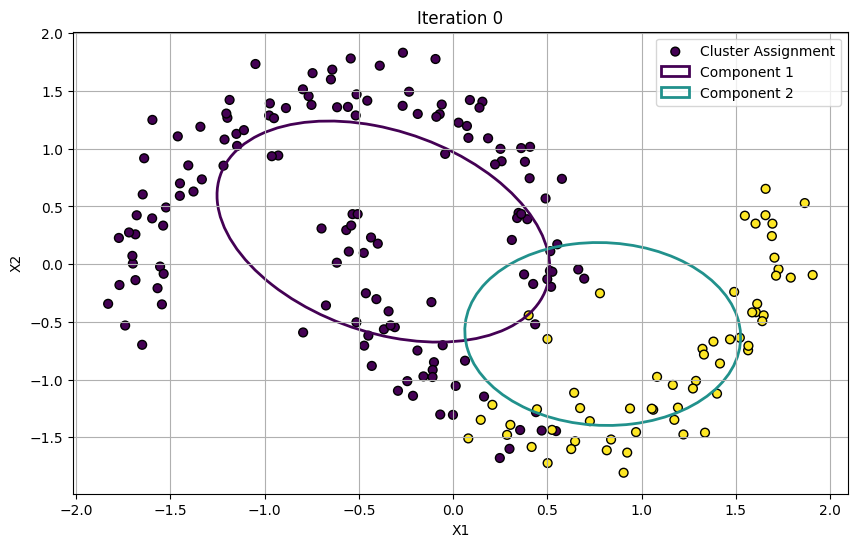

Iteration 10: log-likelihood = -2827.6699387694753


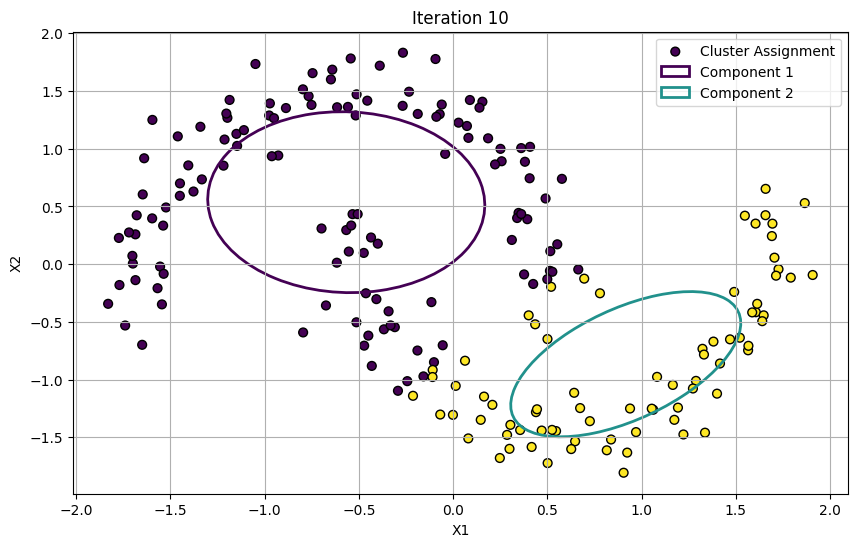

Iteration 20: log-likelihood = -2824.7908791464397


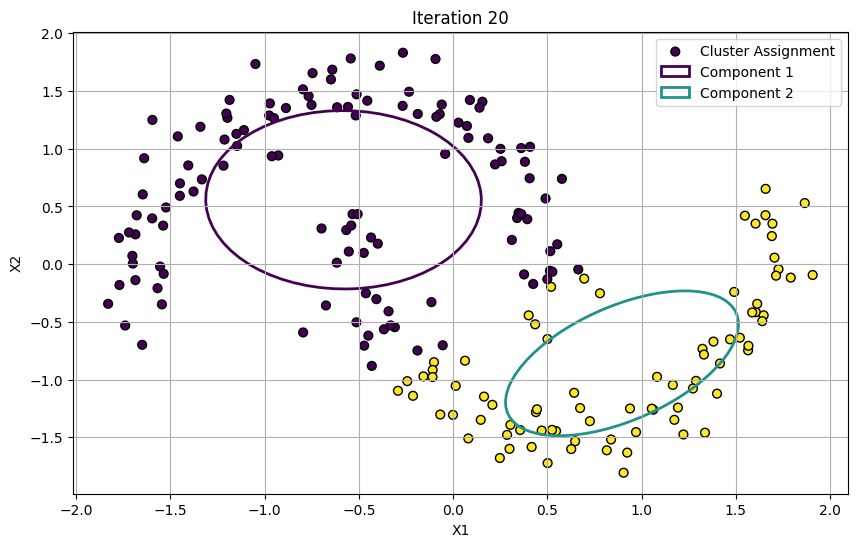

Iteration 30: log-likelihood = -2830.4762274301547


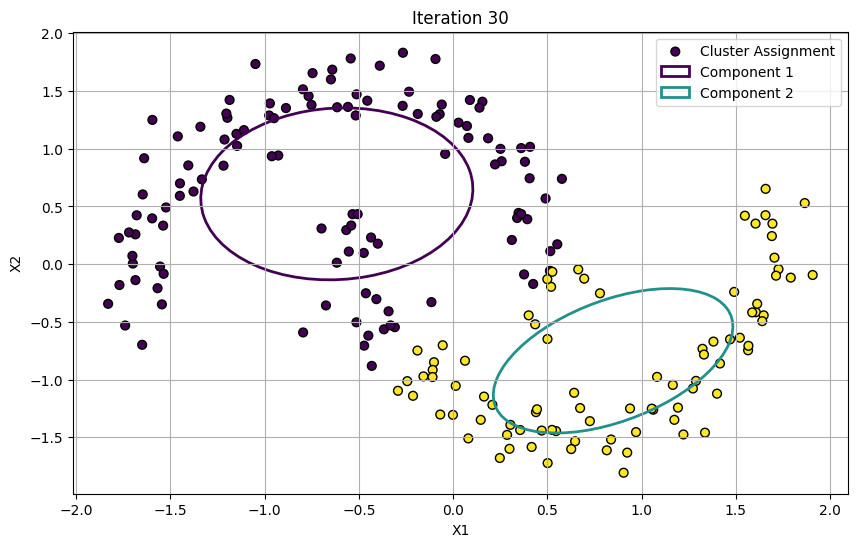

Iteration 40: log-likelihood = -2896.017479670668


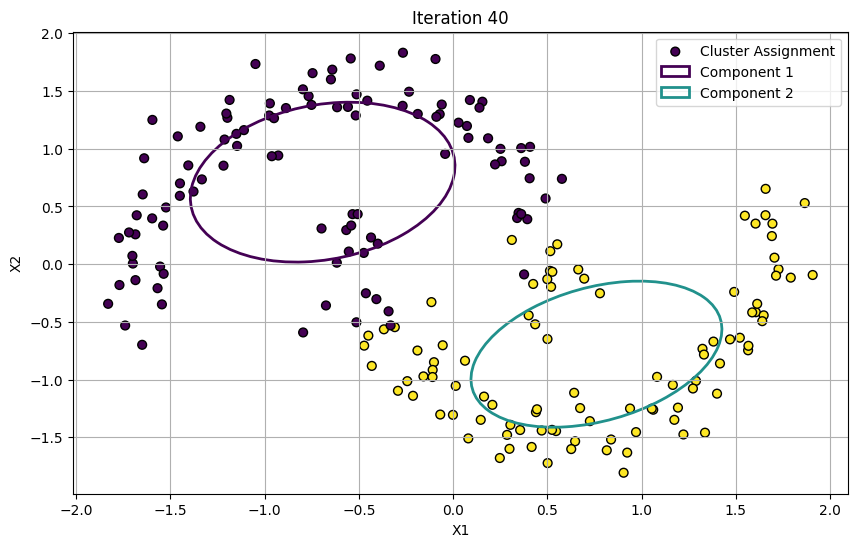

Iteration 50: log-likelihood = -2989.888753484713


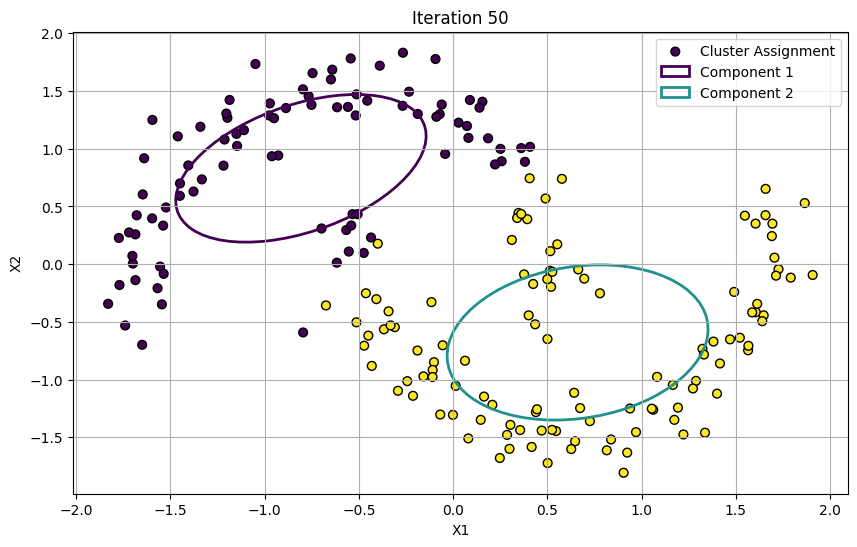

Iteration 60: log-likelihood = -2983.6145682236256


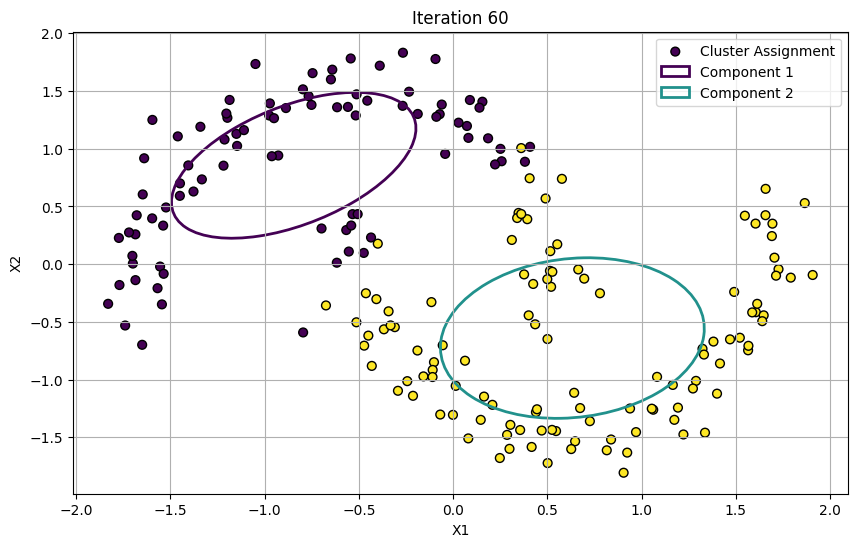

Iteration 70: log-likelihood = -2981.1674609512534


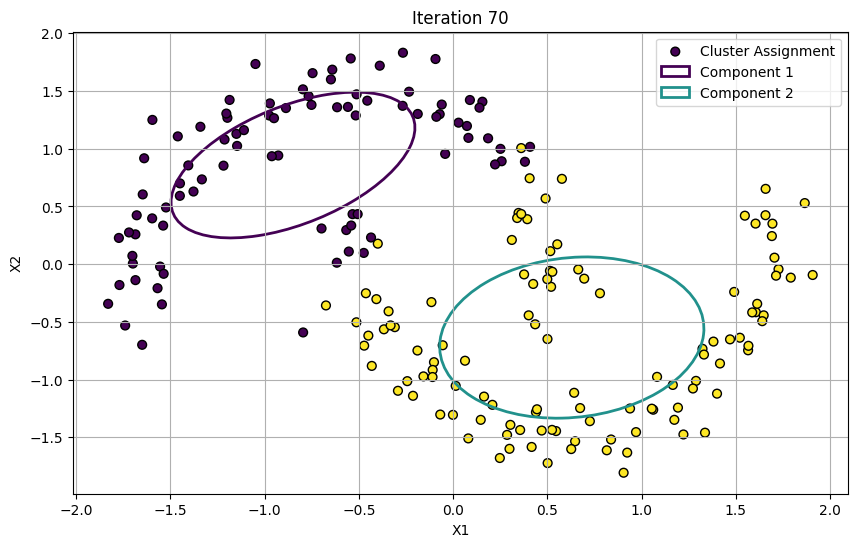

Iteration 80: log-likelihood = -2980.907640225896


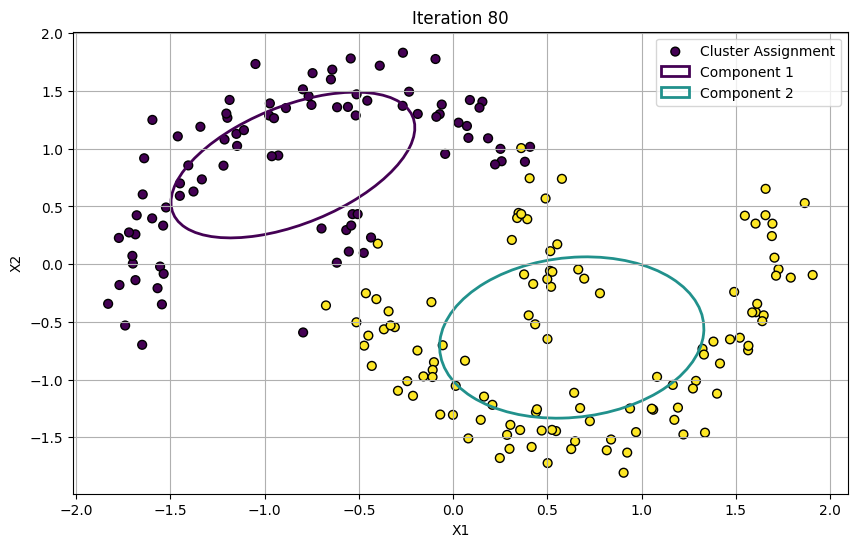

Iteration 90: log-likelihood = -2980.8815969944226


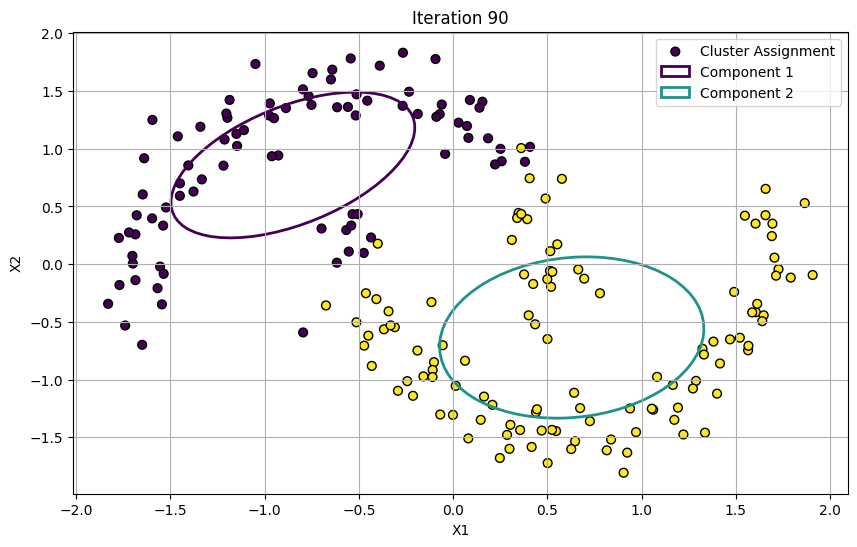

Converged at iteration 99


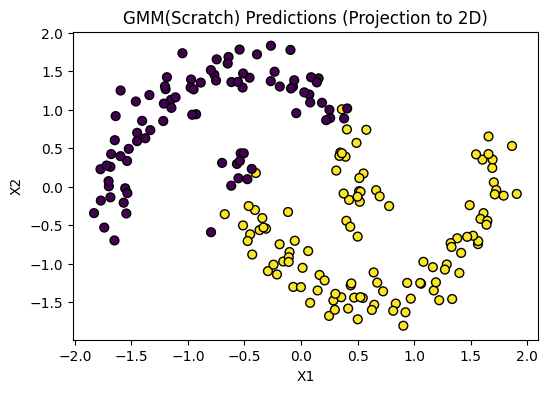

Final means: [[-0.85003422  0.85839084  0.19438123]
 [ 0.62908649 -0.635271   -0.1438561 ]]
Final covariances: [[[ 0.4183016   0.20952887  0.20946402]
  [ 0.20952887  0.39813542  0.03637811]
  [ 0.20946402  0.03637811  0.93948518]]

 [[ 0.49130346  0.05431565  0.14860238]
  [ 0.05431565  0.4878427  -0.0162721 ]
  [ 0.14860238 -0.0162721   0.98742745]]]
Final weights: [0.42531113 0.57468887]


In [ ]:
# Apply GMM-EM algorithm
K = 2
weights, means, covariances, log_likelihoods = gmm_em(X_arr, K, num_iters=200, plot_interval=10)

predictions1 = predict(X_arr, weights, means, covariances)

# Visualize the predicted clusters (for 2D projections)
plt.figure(figsize=(6, 4))
plt.scatter(X_arr[:, 0], X_arr[:, 1], c=predictions1, cmap='viridis', s=40, edgecolor='k')
plt.title("GMM(Scratch) Predictions (Projection to 2D)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

print(f"Final means: {means}")
print(f"Final covariances: {covariances}")
print(f"Final weights: {weights}")

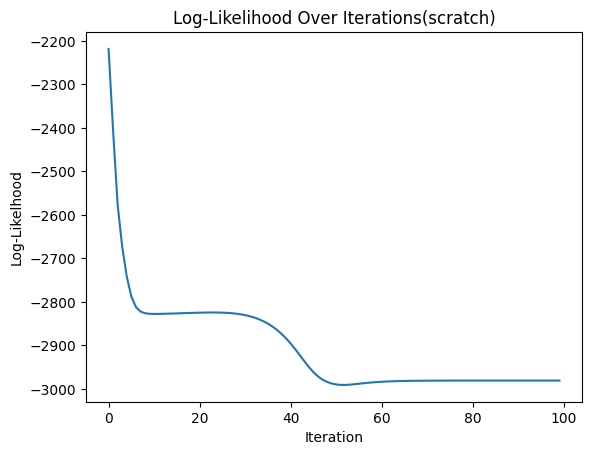

In [ ]:
# Plot log-likelthood aver iterations
plt.plot(log_likelihoods)
plt.title("Log-Likelihood Over Iterations(scratch)")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelhood")
plt. show()

In [ ]:
print(predictions1)

[0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


**Evaluation**

In [ ]:
def confusion_matrix(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_pred)):
      if(y_true[i] == 1):
        if(y_pred[i] == 1):
          tp += 1
        else:
          fn += 1
      else:
        if(y_pred[i] == 1):
          fp += 1
        else:
          tn += 1
    mat = [[tn,fp],[fn,tp]]
    return mat

In [ ]:
# Accuracy
accuracy = np.mean(predictions1 == y_array)
accuracy_percentage = accuracy * 100  # Convert to percentage
print(f'Accuracy: {accuracy_percentage:.4f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_array, predictions1)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_array, predictions1)
print('Classification Report:')
print(class_report)

Accuracy: 83.5000%
Confusion Matrix:
[[77, 23], [10, 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       100
           1       0.80      0.90      0.85       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



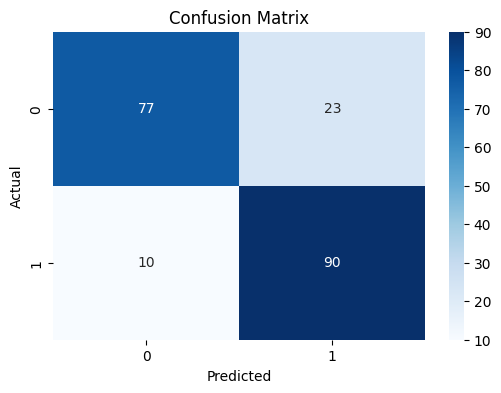

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**2. Model Building (Scratch) with full covariance and fixed initialisations**

In [ ]:
class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]

mean_X1_0 = np.mean(class_0.X1)
mean_X2_0 = np.mean(class_0.X2)
mean_X3_0 = np.mean(class_0.X3)

mean_X1_1 = np.mean(class_1.X1)
mean_X2_1 = np.mean(class_1.X2)
mean_X3_1 = np.mean(class_1.X3)

mean_0 = [mean_X1_0, mean_X2_0, mean_X3_0]
mean_1 = [mean_X1_1, mean_X2_1, mean_X3_1]

In [ ]:
def gmm_em_fixed(data, K, num_iters=100, tol=1e-4, plot_interval=10):
    N, D = data.shape

    means = np.array([mean_0, mean_1])
    weights = np.array([0.5, 0.5])
    covariances = np.array([np.cov(data.T) for _ in range(K)])

    log_likelihoods = []

    for iteration in range(num_iters):
        resp = expectation(data, weights, means, covariances)

        weights, means, covariances = maximization(data, resp)

        ll = log_likelihood(data, weights, means, covariances)
        log_likelihoods.append(ll)

        from matplotlib.patches import Ellipse

        def plot_ellipse(ax, mean, cov, color, label=None):
            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            angle = np.arctan2(*eigenvectors[:, 0][::-1])
            width, height = 2 * np.sqrt(eigenvalues)
            ellipse = Ellipse(mean, width, height, angle=np.degrees(angle), color=color, fill=False, linewidth=2, label=label)
            ax.add_patch(ellipse)

        if iteration % plot_interval == 0:
            print(f"Iteration {iteration}: log-likelihood = {ll}")

            fig, ax = plt.subplots(figsize=(10, 6))

            max_resp = np.argmax(resp, axis=1)
            scatter = ax.scatter(X_arr[:, 0], X_arr[:, 1], c=max_resp, cmap='viridis', s=40, edgecolor='k', label="Cluster Assignment")

            for k in range(K):
                plot_ellipse(ax, means[k][:2], covariances[k][:2, :2], color=scatter.cmap(k / K), label=f"Component {k+1}")

            plt.title(f"Iteration {iteration}")
            plt.xlabel("X1")
            plt.ylabel("X2")
            plt.grid(True)
            plt.legend()
            plt.show()

        if iteration > 0 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            print(f"Converged at iteration {iteration}")
            break

    return weights, means, covariances, log_likelihoods

Iteration 0: log-likelihood = -2073.9869896302152


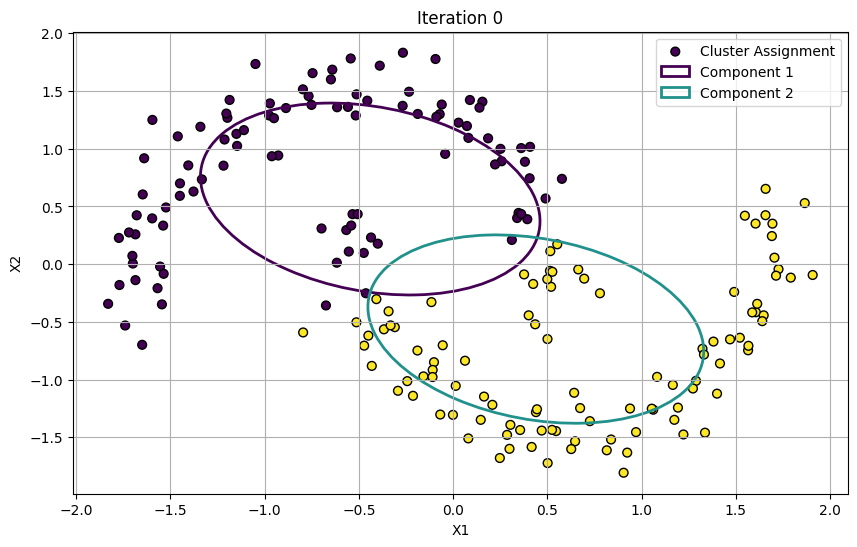

Iteration 10: log-likelihood = -2985.2628040367517


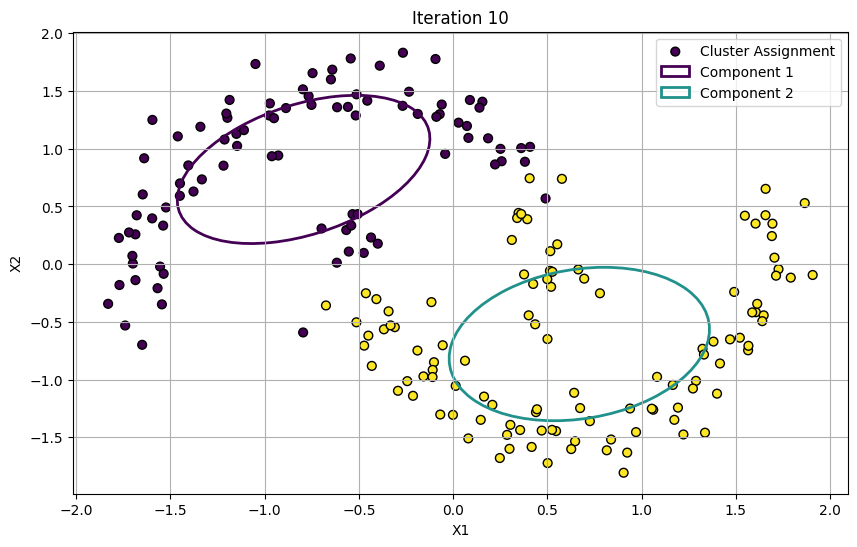

Iteration 20: log-likelihood = -2984.547617022602


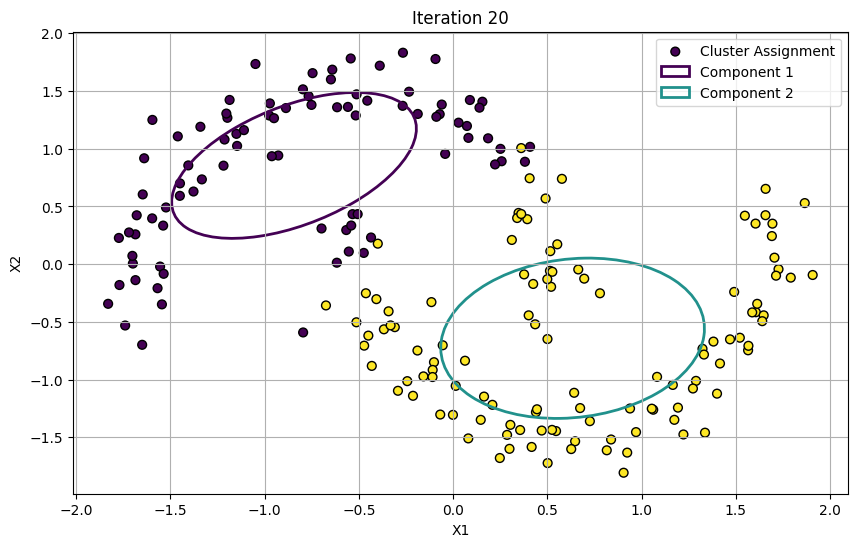

Iteration 30: log-likelihood = -2981.2758867765124


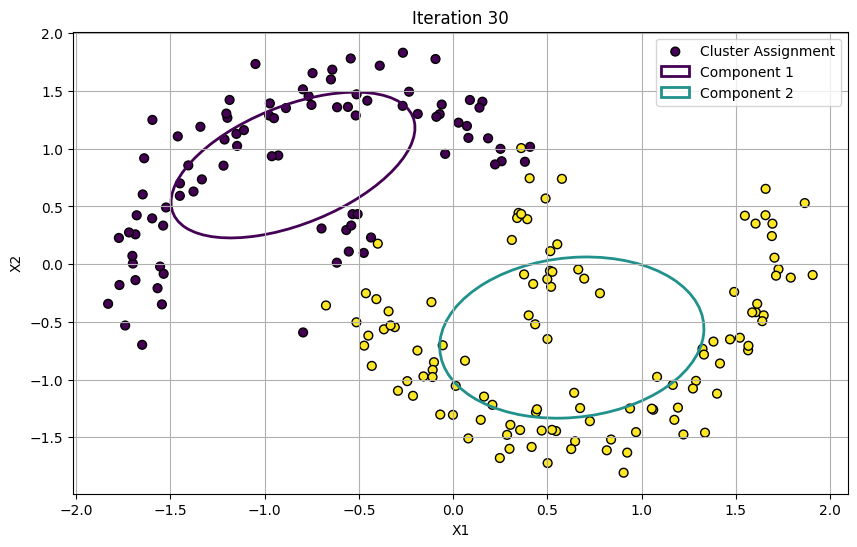

Iteration 40: log-likelihood = -2980.9185817272923


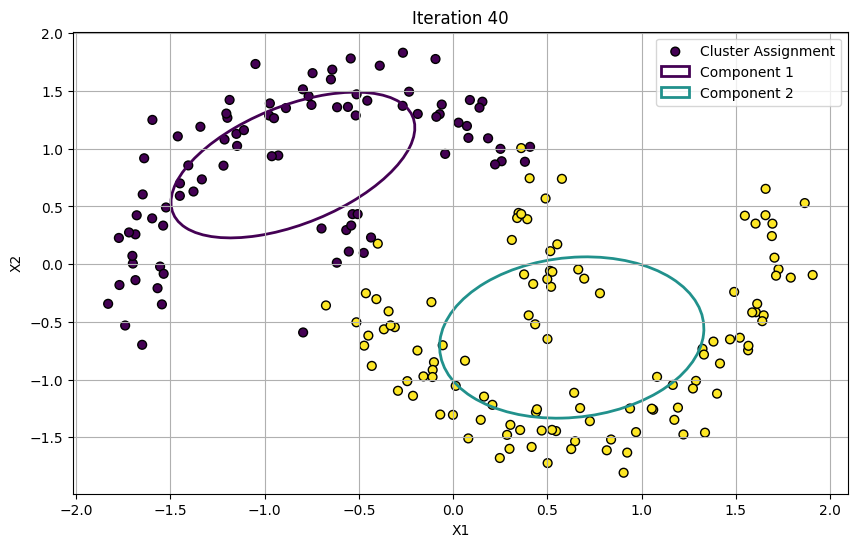

Iteration 50: log-likelihood = -2980.8826888445615


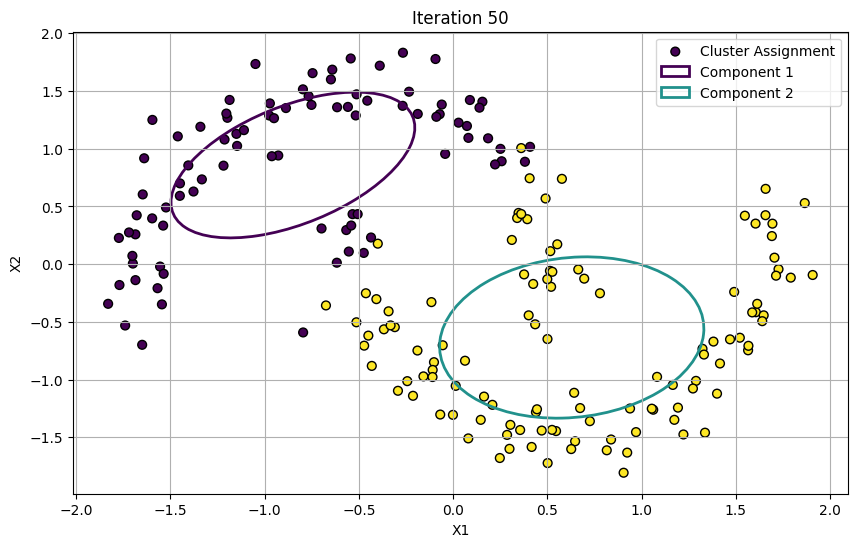

Iteration 60: log-likelihood = -2980.879108673921


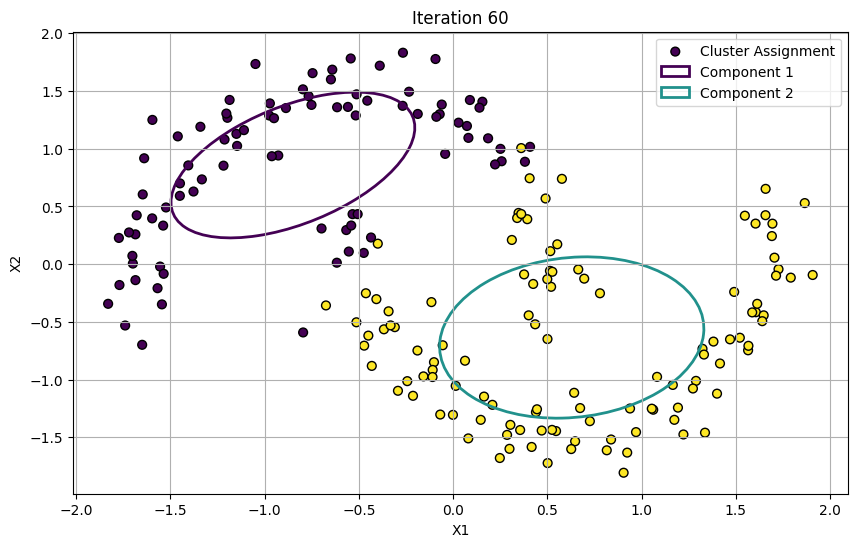

Converged at iteration 61


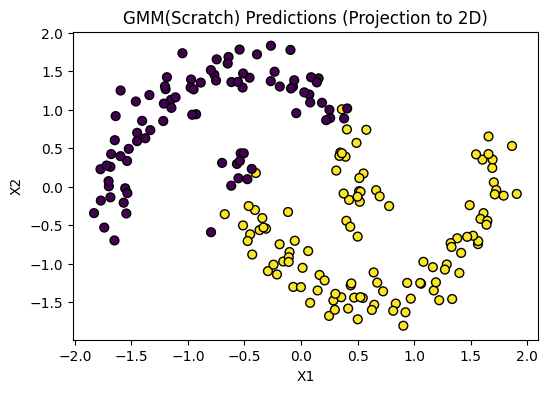

Final means: [[-0.85003429  0.85839088  0.19438123]
 [ 0.62908644 -0.63527092 -0.14385608]]
Final covariances: [[[ 0.41830156  0.2095289   0.20946404]
  [ 0.2095289   0.39813541  0.03637813]
  [ 0.20946404  0.03637813  0.93948519]]

 [[ 0.49130348  0.0543156   0.14860235]
  [ 0.0543156   0.48784277 -0.01627208]
  [ 0.14860235 -0.01627208  0.98742746]]]
Final weights: [0.42531108 0.57468892]


In [ ]:
K = 2
weights, means, covariances, log_likelihoods = gmm_em_fixed(X_arr, K, num_iters=200, plot_interval=10)

predictions2 = predict(X_arr, weights, means, covariances)

plt.figure(figsize=(6, 4))
plt.scatter(X_arr[:, 0], X_arr[:, 1], c=predictions2, cmap='viridis', s=40, edgecolor='k')
plt.title("GMM(Scratch) Predictions (Projection to 2D)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

print(f"Final means: {means}")
print(f"Final covariances: {covariances}")
print(f"Final weights: {weights}")

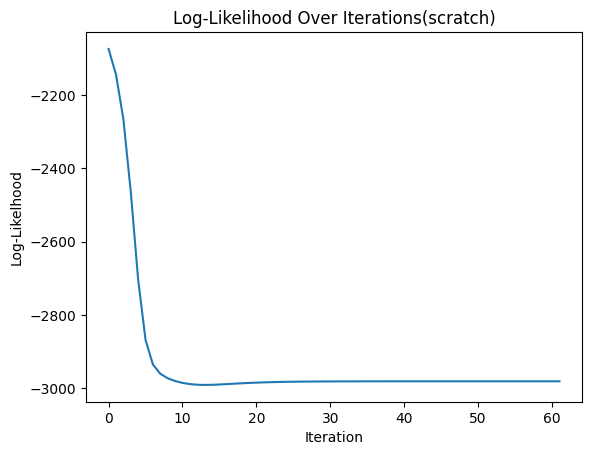

In [ ]:
# Plot log-likelthood aver iterations
plt.plot(log_likelihoods)
plt.title("Log-Likelihood Over Iterations(scratch)")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelhood")
plt. show()

In [ ]:
print(predictions2)

[0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


**Evaluation**

In [ ]:
# Accuracy
accuracy = np.mean(predictions2 == y_array)
accuracy_percentage = accuracy * 100  # Convert to percentage
print(f'Accuracy: {accuracy_percentage:.4f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_array, predictions2)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_array, predictions2)
print('Classification Report:')
print(class_report)

Accuracy: 83.5000%
Confusion Matrix:
[[77, 23], [10, 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       100
           1       0.80      0.90      0.85       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



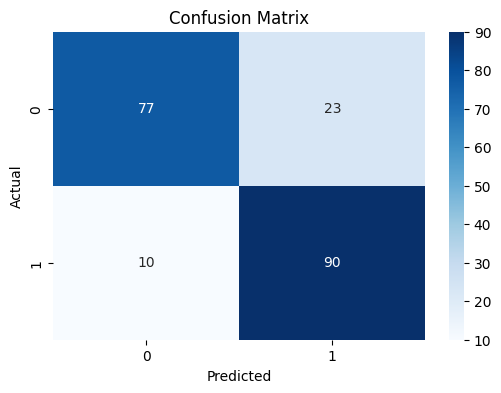

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**3. Model Building (Inbuilt) with full covariance and random initialisations**

In [ ]:
# Create and fit the GMM model
gmm = GaussianMixture(n_components=2, covariance_type='full', init_params='random', random_state=42, tol=1e-4, max_iter=200, verbose=1)
gmm.fit(X_scaled)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged.


GaussianMixture(init_params='random', max_iter=200, n_components=2,
                random_state=42, tol=0.0001, verbose=1)

In [ ]:
log_likelihoods = []

for iteration in range(gmm.n_iter_):
    log_likelihood = gmm.score(X)
    log_likelihoods.append(log_likelihood)

log_likelihoods_array = np.array(log_likelihoods)

print("Log-likelihoods for each iteration:")
for i, ll in enumerate(log_likelihoods_array):
    if i % 10 == 0:  # Prints every 10th iteration
        print(f"Iteration {i}: log-likelihood = {ll:.12f}")

Log-likelihoods for each iteration:
Iteration 0: log-likelihood = -3.459527149976
Iteration 10: log-likelihood = -3.459527149976
Iteration 20: log-likelihood = -3.459527149976
Iteration 30: log-likelihood = -3.459527149976
Iteration 40: log-likelihood = -3.459527149976
Iteration 50: log-likelihood = -3.459527149976
Iteration 60: log-likelihood = -3.459527149976


In [ ]:
# Predict the class labels
y_pred_3 = gmm.predict(X_scaled)

In [ ]:
accuracy = np.mean(y_pred_3 == y_array)

if accuracy < 0.5:
    y_pred_3 = 1 - y_pred_3

**Evaluation**

In [ ]:
# Accuracy
accuracy = np.mean(y_pred_3 == y_array)
accuracy_percentage = accuracy * 100  # Convert to percentage
print(f'Accuracy: {accuracy_percentage:.4f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_array, y_pred_3)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_array, y_pred_3)
print('Classification Report:')
print(class_report)

Accuracy: 71.0000%
Confusion Matrix:
[[84, 16], [42, 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       100
           1       0.78      0.58      0.67       100

    accuracy                           0.71       200
   macro avg       0.73      0.71      0.71       200
weighted avg       0.73      0.71      0.71       200



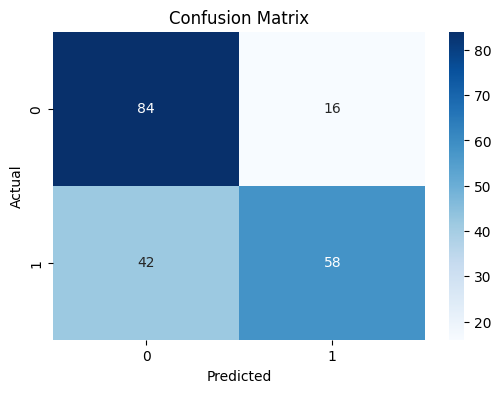

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**4. Model Building (Inbuilt) with diagonal covariance and kmeans initialisations**

In [ ]:
# Create and fit the GMM model
gmm_kmeans = GaussianMixture(n_components=2, covariance_type='diag', init_params='kmeans', random_state=42, tol=1e-4, max_iter=200, verbose=1)
gmm_kmeans.fit(X_scaled)

Initialization 0
Initialization converged.


GaussianMixture(covariance_type='diag', max_iter=200, n_components=2,
                random_state=42, tol=0.0001, verbose=1)

In [ ]:
log_likelihoods = []

for iteration in range(gmm_kmeans.n_iter_):
    log_likelihood = gmm_kmeans.score(X)
    log_likelihoods.append(log_likelihood)

log_likelihoods_array = np.array(log_likelihoods)

print("Log-likelihoods for each iteration:")
for i, ll in enumerate(log_likelihoods_array):
    if i % 10 == 0:  # Prints every 10th iteration
        print(f"Iteration {i}: log-likelihood = {ll:.12f}")

Log-likelihoods for each iteration:
Iteration 0: log-likelihood = -3.479573474013


In [ ]:
print(log_likelihoods_array.size)

5


In [ ]:
# Predict the class labels
y_pred_4 = gmm_kmeans.predict(X_scaled)

In [ ]:
accuracy = np.mean(y_pred_4 == y)

if accuracy < 0.5:
    y_pred_4 = 1 - y_pred_4

**Evaluation**

In [ ]:
# Accuracy
accuracy = np.mean(y_pred_4 == y)
accuracy_percentage = accuracy * 100  # Convert to percentage
print(f'Accuracy: {accuracy_percentage:.4f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_4)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y, y_pred_4)
print('Classification Report:')
print(class_report)

Accuracy: 85.5000%
Confusion Matrix:
[[83, 17], [12, 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       100
           1       0.84      0.88      0.86       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



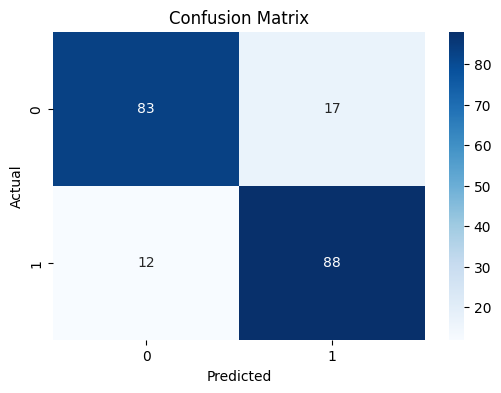

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Ensemble Model**

In [ ]:
from scipy import stats

predictions_gmm1 = predictions1
predictions_gmm2 = predictions2
predictions_gmm3 = y_pred_3
predictions_gmm4 = y_pred_4

predictions_all = np.vstack([predictions_gmm1, predictions_gmm2, predictions_gmm3, predictions_gmm4])
ensemble_predictions, _ = stats.mode(predictions_all, axis=0)
ensemble_predictions = ensemble_predictions.flatten()

print("Ensemble Predictions:", ensemble_predictions)

Ensemble Predictions: [0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


**Evaluation**

In [ ]:
# Accuracy
accuracy = np.mean(ensemble_predictions == y)
accuracy_percentage = accuracy * 100  # Convert to percentage
print(f'Accuracy: {accuracy_percentage:.4f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_4)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y, y_pred_4)
print('Classification Report:')
print(class_report)

Accuracy: 86.0000%
Confusion Matrix:
[[83, 17], [12, 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       100
           1       0.84      0.88      0.86       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



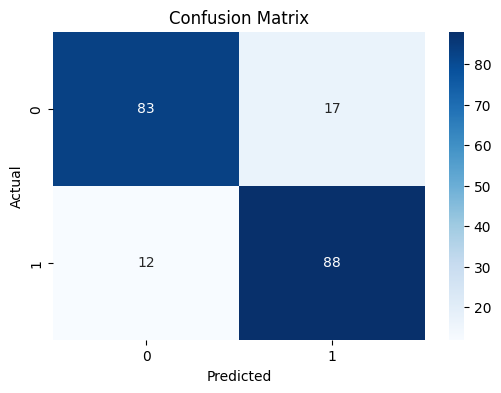

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Inference:**


Comparision among the models based on their accuracy and no of iterations they took to converge:
*   GMM scratch (full covariance, random initialisation) = 83.50% (99 iterations)
*   GMM scratch (full covariance, fixed mean initialisation) =  83.50% (61 iterations)
*   GMM inbuild (full covariance, random initialisation) = 71% (60 iterations)
*   GMM inbuild (diagonal covariance, kmeans initialisation) = 85.50% (5 iterations)
*   GMM Ensembled Model = 86.00%

